In [112]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as mpl

In [113]:
clinical_trial_df = pd.read_csv("Pymaceuticals/raw_data/clinicaltrial_data.csv")
mouse_drug_df = pd.read_csv("Pymaceuticals/raw_data/mouse_drug_data.csv")

In [114]:
clinical_trial_df.sort_values('Mouse ID').head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
113,a203,0,45.000000,0
389,a203,5,48.508468,0
1295,a203,25,56.793208,1
1675,a203,40,63.593490,2
1577,a203,35,61.931650,2


In [115]:
mouse_drug_df.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [116]:
trial_drug_df = pd.merge(clinical_trial_df, mouse_drug_df, on='Mouse ID', how='inner')
trial_drug_df = trial_drug_df.sort_values('Timepoint', ascending=True)

In [117]:
trial_drug_df.reset_index(inplace=True, drop=True)
trial_drug_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,i635,0,45.0,0,Propriva
2,g791,0,45.0,0,Ramicane
3,w746,0,45.0,0,Propriva
4,r107,0,45.0,0,Propriva


In [118]:
drug_groups = trial_drug_df[['Timepoint', 'Tumor Volume (mm3)', 'Drug']]
drug_groups = drug_groups.groupby(['Drug', 'Timepoint']).mean()
drug_groups.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [119]:
drug_groups = drug_groups.pivot_table(index='Timepoint', columns='Drug')
drug_groups.columns = drug_groups.columns.droplevel()
drug_groups.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [120]:
drug_groups_error = trial_drug_df[['Timepoint', 'Tumor Volume (mm3)', 'Drug']]
drug_groups_error = drug_groups_error.groupby(['Drug', 'Timepoint']).sem()
drug_groups_error.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [121]:
drug_groups_error = drug_groups_error.pivot_table(index='Timepoint', columns='Drug')
drug_groups_error.columns = drug_groups_error.columns.droplevel()
drug_groups_error

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


In [137]:
mpl.plot(drug_groups.index, drug_groups['Capomulin'], linestyle='dashed', marker ='o')
mpl.plot(drug_groups.index, drug_groups['Infubinol'], linestyle='dashed', marker ='^')
mpl.plot(drug_groups.index, drug_groups['Ketapril'], linestyle='dashed', marker ='x')
mpl.plot(drug_groups.index, drug_groups['Placebo'], linestyle='dashed', marker ='+')
mpl.hlines(45,-1,46, alpha=.25)
mpl.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0)
mpl.errorbar(drug_groups.index, drug_groups['Capomulin'], yerr=drug_groups_error['Capomulin'], linewidth=.5, capsize=3)
mpl.errorbar(drug_groups.index, drug_groups['Infubinol'], yerr=drug_groups_error['Infubinol'], linewidth=.5, capsize=3)
mpl.errorbar(drug_groups.index, drug_groups['Ketapril'], yerr=drug_groups_error['Ketapril'], linewidth=.5, capsize=3)
mpl.errorbar(drug_groups.index, drug_groups['Placebo'], yerr=drug_groups_error['Placebo'], linewidth=.5, capsize=3)

mpl.ylabel('Tumor Volume (mm3)')
mpl.xlabel('Timepoint')
mpl.title('Tumor Volume over Time', y=1.2)


Text(0.5,1.2,'Tumor Volume over Time')

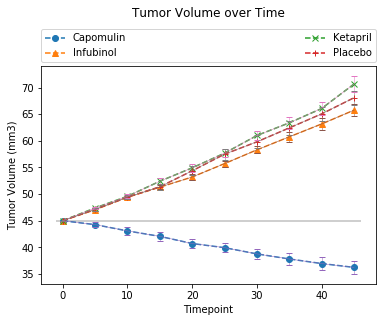

In [138]:
mpl.show()

In [124]:
metastatic = trial_drug_df[['Timepoint', 'Metastatic Sites', 'Drug']]
metastatic = metastatic.groupby(['Drug', 'Timepoint']).mean()
metastatic.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [125]:
metastatic = metastatic.pivot_table(index='Timepoint', columns='Drug')
metastatic.columns = metastatic.columns.droplevel()
metastatic

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [126]:
metastatic_error = trial_drug_df[['Timepoint', 'Metastatic Sites', 'Drug']]
metastatic_error = metastatic_error.groupby(['Drug', 'Timepoint']).sem()
metastatic_error.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [127]:
metastatic_error = metastatic_error.pivot_table(index='Timepoint', columns='Drug')
metastatic_error.columns = metastatic_error.columns.droplevel()
metastatic_error

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


In [128]:
mpl.plot(metastatic.index, metastatic['Capomulin'], linestyle='dashed', marker ='o')
mpl.plot(metastatic.index, metastatic['Infubinol'], linestyle='dashed', marker ='^')
mpl.plot(metastatic.index, metastatic['Ketapril'], linestyle='dashed', marker ='x')
mpl.plot(metastatic.index, metastatic['Placebo'], linestyle='dashed', marker ='+')
mpl.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0)
mpl.errorbar(metastatic.index, metastatic['Capomulin'], yerr=metastatic_error['Capomulin'], linewidth=.5, capsize=3)
mpl.errorbar(metastatic.index, metastatic['Infubinol'], yerr=metastatic_error['Infubinol'], linewidth=.5, capsize=3)
mpl.errorbar(metastatic.index, metastatic['Ketapril'], yerr=metastatic_error['Ketapril'], linewidth=.5, capsize=3)
mpl.errorbar(metastatic.index, metastatic['Placebo'], yerr=metastatic_error['Placebo'], linewidth=.5, capsize=3)

mpl.ylabel('Number of Sites')
mpl.xlabel('Timepoint')
mpl.title('Number of Metastatic Sites', y=1.2)


Text(0.5,1.2,'Number of Metastatic Sites')

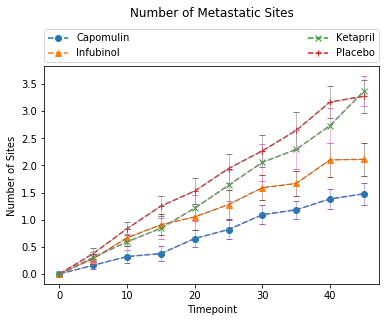

In [129]:
mpl.show()

In [130]:
survivors = trial_drug_df[['Timepoint', 'Tumor Volume (mm3)', 'Drug']]
survivors = survivors.groupby(['Drug', 'Timepoint']).count()
survivors.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                          25
          5                          25
          10                         25
          15                         24
          20                         23

In [131]:
survivors = survivors.pivot_table(index='Timepoint', columns='Drug')
survivors.columns = survivors.columns.droplevel()
survivors

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [132]:
mpl.plot(survivors.index, survivors['Capomulin'], linestyle='dashed', marker ='o')
mpl.plot(survivors.index, survivors['Infubinol'], linestyle='dashed', marker ='^')
mpl.plot(survivors.index, survivors['Ketapril'], linestyle='dashed', marker ='x')
mpl.plot(survivors.index, survivors['Placebo'], linestyle='dashed', marker ='+')
mpl.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0)

mpl.ylabel('Number of Mice')
mpl.xlabel('Timepoint')
mpl.title('Surviving Mice', y=1.2)

Text(0.5,1.2,'Surviving Mice')

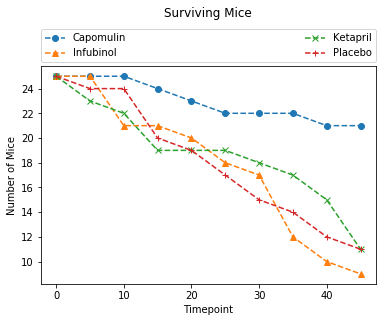

In [133]:
mpl.show()

In [134]:
#tumor vol change
percent_change = drug_groups.pct_change(periods=9)*100
percent_change = percent_change[-1:]
percent_change = percent_change[['Capomulin', 'Infubinol','Ketapril','Placebo']]
percent_change = percent_change.squeeze()
percent_change

Drug
Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
Name: 45, dtype: float64

In [135]:
colors = np.where(percent_change<0,'green','red')
colors = colors.tolist()
colors

['green', 'red', 'red', 'red']

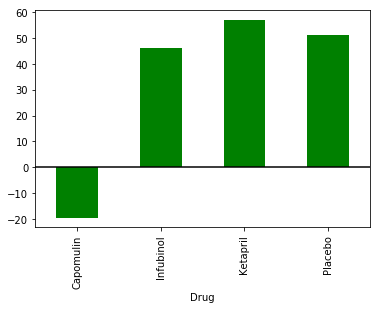

In [136]:
ax = percent_change.plot.bar(color=['green', 'red', 'red', 'red'])
#ax = percent_change.plot.bar(color=colors)
ax.hlines(0, -1, 4)
ax.set_xticklabels(labels = ['Capomulin', 'Infubinol','Ketapril','Placebo'])
mpl.show()